# South China Pole Compilation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

## Version 1

No averaging of poles.

### Poles

The following post-late Paleozoic poles were taken from the compilation in Wu et al. (2017), Table 1:

In [2]:
Wu2017_df = pd.read_csv('../Data/Wu2017a_SouthChina.csv')

The following Silurian pole was taken from Huang et al. (2000):

In [3]:
Huang2000_lat = 14.9
Huang2000_lon = 196.1
Huang2000_a95 = 5.1
Huang2000_age = 430
Huang2000_age_upper = np.nan
Huang2000_age_lower = np.nan
Huang2000_ref = 'Huang et al. (2000)'
Huang2000_loc = 'Leijitun Section'
Huang2000_note = '-'

The following late Ordovician pole was taken from Han et al. (2015):

In [4]:
Han2015_lat = -45.8
Han2015_lon = 191.3
Han2015_a95 = np.sqrt(4.2 * 2.4)
Han2015_age = 456
Han2015_age_upper = np.nan
Han2015_age_lower = np.nan
Han2015_ref = 'Han et al. (2015)'
Han2015_loc = 'Pagoda Formation'
Han2015_note = '-'

The following middle Cambrian pole was taken from Yang et al. (2004):

In [5]:
Yang2004_lat = -51.3
Yang2004_lon = 166.0
Yang2004_a95 = np.sqrt(4.4 * 8.6)
Yang2004_age = 510
Yang2004_age_upper = np.nan
Yang2004_age_lower = np.nan
Yang2004_ref = 'Yang et al. (2004)'
Yang2004_loc = 'Douposi Formation'
Yang2004_note = '-'

The following Ediacaran pole was taken from Macouin et al. (2004):

In [6]:
Macouin2004_lat = 0.6
Macouin2004_lon = 196.9
Macouin2004_a95 = np.sqrt(4.5 * 9.0)
Macouin2004_age = 584
Macouin2004_age_upper = np.nan
Macouin2004_age_lower = np.nan
Macouin2004_ref = 'Macouin et al. (2004)'
Macouin2004_loc = 'Doushantuo Formation'
Macouin2004_note = '-'

The following Tonian pole from the Yanbian Dikes was published in Niu et al. (2015):

In [7]:
Niu2015_lat = 45.1
Niu2015_lon = 130.4
Niu2015_a95 = 19
Niu2015_age = 824
Niu2015_age_upper = 824-6
Niu2015_age_lower = 824+6
Niu2015_ref = 'Niu et al. (2015)'
Niu2015_loc = 'Yanbian Dikes Group A'
Niu2015_note = 'A vertical axis rotation is applied to these data in the paper. They are not tilt-corrected (except for one) although they are located within a mobile belt.'

The following Tonian pole from the Madiyi Formation was published in an AGU abstract (Hanbiao et al. 2017)

In [8]:
Hanbiao2017_lat = 47.6
Hanbiao2017_lon = 46.7
Hanbiao2017_a95 = 5.6
Hanbiao2017_age = 810
Hanbiao2017_age_upper = 810-50
Hanbiao2017_age_lower = 810+10
Hanbiao2017_ref = 'Hanbiao et al. 2017'
Hanbiao2017_loc = 'Madiyi Formation'
Hanbiao2017_note = 'Without inclination correction.'

Hanbiao2017_ic_lat = 44.8
Hanbiao2017_ic_lon = 80.2
Hanbiao2017_ic_a95 = 3.4
Hanbiao2017_ic_age = 810
Hanbiao2017_ic_age_upper = 810-50
Hanbiao2017_ic_age_lower = 810+10
Hanbiao2017_ic_ref = 'Hanbiao et al. 2017'
Hanbiao2017_ic_loc = 'Madiyi Formation'
Hanbiao2017_ic_note = 'Inclination corrected pole (using the E/I method)'

The following Tonian pole from the Chengjiang Formation is unpublished and is from a manuscript that Nick reviewed

In [9]:
Chengjiang_lat = 32.8
Chengjiang_lon = 56.3
Chengjiang_a95 = np.sqrt(7.1 * 8.6)
Chengjiang_age = 800
Chengjiang_age_upper = 800-8
Chengjiang_age_lower = 800+8
Chengjiang_ref = ''
Chengjiang_loc = 'Chengjiang Formation'
Chengjiang_note = 'This is the pole without inclination correction. And it is unpublished so can not use in any publication'

The following poles were taken from the compilation in Zhang et al. (2015), Table 2:

note:
* ages are approximated based on the period/epoch provided in the table
* '?' indicate references that are unavailable

In [10]:
Zhang2015_df = pd.DataFrame({'lat':[65.3,47.5,45.4,36.1,-29.5,-38.4,23.9],
                             'lon':[265.2,229.1,234.1,231.4,227.1,154.9,187.0],
                             'a95':[np.sqrt(8.1*4.2),np.sqrt(9.6*4.8),np.sqrt(6.6*3.3),np.sqrt(12.5*6.5),6.3,
                                    np.sqrt(14.2*7.4),np.sqrt(3.0*1.8)],
                             'age':[290,340,370,400,460,480,580],
                             'reference':['Wu et al. (1998)','Zhang et al. (2001)','Zhang et al. (2001)',
                                          'Zhang et al. (2001)','Zhang et al. (2012)','Wu et al. (1998)',
                                          'Zhang et al. (2015)'],
                             'formation/lithology/location':['Limestone; Xingshan, Hubei','?','?','?',
                                                             '?','Limestone; Xingshan, Hubei','Doushantuo Formation']})

The following Neoproterozoic poles were taken from the compilation in Zhang et al. (2013), Table 2, with the age of the Xiaofeng dykes modified according to Wang et al. (2016):

In [11]:
Zhang2013_df = pd.DataFrame({'lat':[9.3,0.2,3.4,13.9,2.2,13.5],
                             'lon':[165.9,151.2,163.6,165.3,153.4,91],
                             'a95':[4.3,np.sqrt(7.5*5.4),np.sqrt(2.7*2.1),np.sqrt(9.6*7.0),np.sqrt(13.1*9.4),
                                    np.sqrt(11.3*10.5)],
                             'age':[636,636,748,748,748,821],
                             'reference':['Zhang et al. (2013)','Zhang and Piper (1997)','Evans et al. (2000)',
                                          'Evans et al. (2000)','Zhang and Piper (1997)','Li et al. (2004)'],
                             'formation/lithology/location':['Nantuo Formation','Nantuo Formation','Liantuo Formation',
                                                             'Liantuo Formation','Chengjiang Formation',
                                                             'Xiaofeng Dykes']})

Compile all the poles into a master dataframe:

In [39]:
compiled = Zhang2013_df.copy()
compiled = compiled.append(Zhang2015_df, ignore_index=True)
j = len(compiled.index)

for i in range(len(Wu2017_df.index)):
    if np.isfinite(Wu2017_df['lonP_IFcorr'][i]):
        compiled.loc[j, 'lat'] = Wu2017_df['latP_IFcorr'][i]
        compiled.loc[j, 'lon'] = Wu2017_df['lonP_IFcorr'][i]
    else:
        compiled.loc[j, 'lat'] = Wu2017_df['latP'][i]
        compiled.loc[j, 'lon'] = Wu2017_df['lonP'][i]
    compiled.loc[j, 'a95'] = Wu2017_df['a95'][i]
    compiled.loc[j, 'age'] = Wu2017_df['Age (Ma)'][i]
    compiled.loc[j, 'reference'] = Wu2017_df['Reference'][i]
    compiled.loc[j, 'formation/lithology/location'] = Wu2017_df['Host rock lithology, location'][i]
    j = j + 1
    
compiled.loc[j, 'lat'] = Huang2000_lat
compiled.loc[j, 'lon'] = Huang2000_lon
compiled.loc[j, 'a95'] = Huang2000_a95
compiled.loc[j, 'age'] = Huang2000_age
compiled.loc[j, 'age upper'] = Huang2000_age_upper
compiled.loc[j, 'age lower'] = Huang2000_age_lower
compiled.loc[j, 'reference'] = Huang2000_ref
compiled.loc[j, 'formation/lithology/location'] = Huang2000_loc
compiled.loc[j, 'note'] = Huang2000_note
j = j + 1

compiled.loc[j, 'lat'] = Han2015_lat
compiled.loc[j, 'lon'] = Han2015_lon
compiled.loc[j, 'a95'] = Han2015_a95
compiled.loc[j, 'age'] = Han2015_age
compiled.loc[j, 'age upper'] = Han2015_age_upper
compiled.loc[j, 'age lower'] = Han2015_age_lower
compiled.loc[j, 'reference'] = Han2015_ref
compiled.loc[j, 'formation/lithology/location'] = Han2015_loc
compiled.loc[j, 'note'] = Han2015_note
j = j + 1

compiled.loc[j, 'lat'] = Yang2004_lat
compiled.loc[j, 'lon'] = Yang2004_lon
compiled.loc[j, 'a95'] = Yang2004_a95
compiled.loc[j, 'age'] = Yang2004_age
compiled.loc[j, 'age upper'] = Yang2004_age_upper
compiled.loc[j, 'age upper'] = Yang2004_age_lower
compiled.loc[j, 'reference'] = Yang2004_ref
compiled.loc[j, 'formation/lithology/location'] = Yang2004_loc
compiled.loc[j, 'note'] = Yang2004_note
j = j + 1

compiled.loc[j, 'lat'] = Macouin2004_lat
compiled.loc[j, 'lon'] = Macouin2004_lon
compiled.loc[j, 'a95'] = Macouin2004_a95
compiled.loc[j, 'age'] = Macouin2004_age
compiled.loc[j, 'age upper'] = Macouin2004_age_upper
compiled.loc[j, 'age lower'] = Macouin2004_age_lower
compiled.loc[j, 'reference'] = Macouin2004_ref
compiled.loc[j, 'formation/lithology/location'] = Macouin2004_loc
compiled.loc[j, 'note'] = Macouin2004_note
j = j + 1

compiled.loc[j, 'lat'] = Niu2015_lat
compiled.loc[j, 'lon'] = Niu2015_lon
compiled.loc[j, 'a95'] = Niu2015_a95
compiled.loc[j, 'age'] = Niu2015_age
compiled.loc[j, 'age upper'] = Niu2015_age_upper
compiled.loc[j, 'age lower'] = Niu2015_age_lower
compiled.loc[j, 'reference'] = Niu2015_ref
compiled.loc[j, 'formation/lithology/location'] = Niu2015_loc
compiled.loc[j, 'note'] = Niu2015_note
j = j + 1

compiled.loc[j, 'lat'] = Hanbiao2017_lat
compiled.loc[j, 'lon'] = Hanbiao2017_lon
compiled.loc[j, 'a95'] = Hanbiao2017_a95
compiled.loc[j, 'age'] = Hanbiao2017_age
compiled.loc[j, 'age upper'] = Hanbiao2017_age_upper
compiled.loc[j, 'age lower'] = Hanbiao2017_age_lower
compiled.loc[j, 'reference'] = Hanbiao2017_ref
compiled.loc[j, 'formation/lithology/location'] = Hanbiao2017_loc
compiled.loc[j, 'note'] = Hanbiao2017_note
j = j + 1

compiled.loc[j, 'lat'] = Hanbiao2017_ic_lat
compiled.loc[j, 'lon'] = Hanbiao2017_ic_lon
compiled.loc[j, 'a95'] = Hanbiao2017_ic_a95
compiled.loc[j, 'age'] = Hanbiao2017_ic_age
compiled.loc[j, 'age upper'] = Hanbiao2017_ic_age_upper
compiled.loc[j, 'age lower'] = Hanbiao2017_ic_age_lower
compiled.loc[j, 'reference'] = Hanbiao2017_ic_ref
compiled.loc[j, 'formation/lithology/location'] = Hanbiao2017_ic_loc
compiled.loc[j, 'note'] = Hanbiao2017_ic_note
j = j + 1

#compiled.loc[j, 'lat'] = Chengjiang_lat
#compiled.loc[j, 'lon'] = Chengjiang_lon
#compiled.loc[j, 'a95'] = Chengjiang_a95
#compiled.loc[j, 'age'] = Chengjiang_age
#compiled.loc[j, 'age upper'] = Chengjiang_age_upper
#compiled.loc[j, 'age lower'] = Chengjiang_age_lower
#compiled.loc[j, 'reference'] = Chengjiang_ref
#compiled.loc[j, 'formation/lithology/location'] = Chengjiang_loc
#compiled.loc[j, 'note'] = Chengjiang_note
#j = j + 1

compiled.sort_values('age', inplace=True)
compiled = compiled[['age',
                     'age upper',
                     'age lower',
                     'lat',
                     'lon',
                     'a95',
                     'formation/lithology/location',
                     'reference',
                     'note']]
compiled.reset_index(inplace=True, drop=True)
compiled

,age,age upper,age lower,lat,lon,a95,formation/lithology/location,reference,note
0,61.0,NaN,NaN,79.6,231.3,5.600000,Sediments; Hunan,Bowen et al. (2002),NaN
1,61.0,NaN,NaN,77.2,223.7,3.500000,Sediments; Jiangxi,Clyde et al. (2008),NaN
2,61.0,NaN,NaN,86.1,99.2,4.400000,Sandstone; Hunan,Sun et al. (2006),NaN
3,61.0,NaN,NaN,74.9,191.9,6.500000,Sandstone; Yunnan,Yoshioka et al. (2003),NaN
4,61.0,NaN,NaN,80.6,141.3,8.500000,Sandstone; Guangxi,Zhao et al. (1994),NaN
5,66.0,NaN,NaN,76.7,144.9,6.700000,Sandstone; Anhui,Gilder et al. (1999),NaN
6,80.0,NaN,NaN,69.3,211.2,8.900000,Dykes; Hongkong,Li et al. (2005),NaN
7,83.3,NaN,NaN,74.4,225.1,5.200000,Redbeds; Jiangxi,Wang and Yang (2007),NaN
8,83.3,NaN,NaN,71.9,124.7,4.000000,Redbed; Hunan,Zhu et al. (2006),NaN
9,83.3,NaN,NaN,70.8,137.1,8.000000,Sandstone; Guandong,Morinaga and Liu (2004),NaN


### Plots

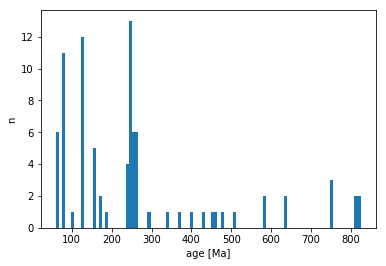

In [40]:
fig, ax = plt.subplots()
ax.hist(compiled['age'], bins=100)
ax.set_xlabel('age [Ma]')
ax.set_ylabel('n')
plt.show(fig)

In [41]:
NP_compiled = compiled[compiled['age']>540].copy()
NP_compiled.reset_index(drop=True, inplace=True)
NP_compiled

,age,age upper,age lower,lat,lon,a95,formation/lithology/location,reference,note
0,580.0,NaN,NaN,23.9,187.0,2.323790,Doushantuo Formation,Zhang et al. (2015),NaN
1,584.0,NaN,NaN,0.6,196.9,6.363961,Doushantuo Formation,Macouin et al. (2004),-
2,636.0,NaN,NaN,9.3,165.9,4.300000,Nantuo Formation,Zhang et al. (2013),NaN
3,636.0,NaN,NaN,0.2,151.2,6.363961,Nantuo Formation,Zhang and Piper (1997),NaN
4,748.0,NaN,NaN,2.2,153.4,11.096846,Chengjiang Formation,Zhang and Piper (1997),NaN
5,748.0,NaN,NaN,13.9,165.3,8.197561,Liantuo Formation,Evans et al. (2000),NaN
6,748.0,NaN,NaN,3.4,163.6,2.381176,Liantuo Formation,Evans et al. (2000),NaN
7,810.0,760.0,820.0,47.6,46.7,5.600000,Madiyi Formation,Hanbiao et al. 2017,Without inclination correction.
8,810.0,760.0,820.0,44.8,80.2,3.400000,Madiyi Formation,Hanbiao et al. 2017,Inclination corrected pole (using the E/I method)
9,821.0,NaN,NaN,13.5,91.0,10.892658,Xiaofeng Dykes,Li et al. (2004),NaN


In [42]:
# pick the Hanbiao pole without inclination correction
NP_compiled.drop(8, inplace=True)
NP_compiled.reset_index(drop=True, inplace=True)
NP_compiled

,age,age upper,age lower,lat,lon,a95,formation/lithology/location,reference,note
0,580.0,NaN,NaN,23.9,187.0,2.323790,Doushantuo Formation,Zhang et al. (2015),NaN
1,584.0,NaN,NaN,0.6,196.9,6.363961,Doushantuo Formation,Macouin et al. (2004),-
2,636.0,NaN,NaN,9.3,165.9,4.300000,Nantuo Formation,Zhang et al. (2013),NaN
3,636.0,NaN,NaN,0.2,151.2,6.363961,Nantuo Formation,Zhang and Piper (1997),NaN
4,748.0,NaN,NaN,2.2,153.4,11.096846,Chengjiang Formation,Zhang and Piper (1997),NaN
5,748.0,NaN,NaN,13.9,165.3,8.197561,Liantuo Formation,Evans et al. (2000),NaN
6,748.0,NaN,NaN,3.4,163.6,2.381176,Liantuo Formation,Evans et al. (2000),NaN
7,810.0,760.0,820.0,47.6,46.7,5.600000,Madiyi Formation,Hanbiao et al. 2017,Without inclination correction.
8,821.0,NaN,NaN,13.5,91.0,10.892658,Xiaofeng Dykes,Li et al. (2004),NaN
9,824.0,818.0,830.0,45.1,130.4,19.000000,Yanbian Dikes Group A,Niu et al. (2015),A vertical axis rotation is applied to these d...


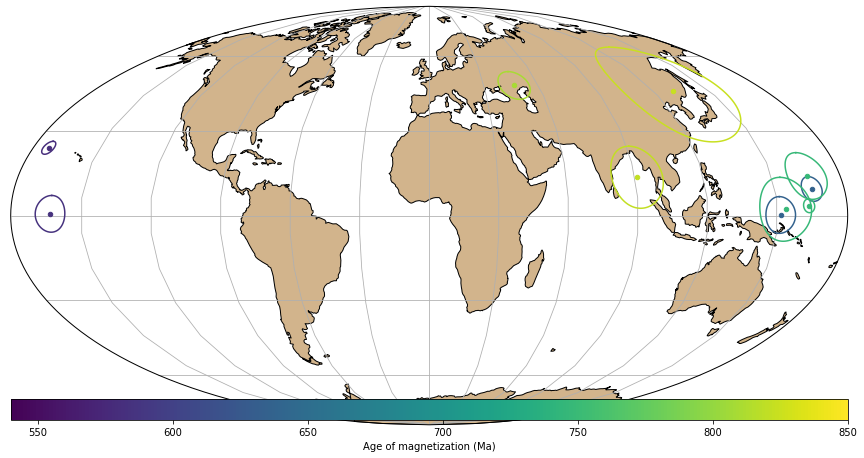

In [43]:
map_ax = ipmag.make_mollweide_map(figsize=(15,10))

cmap = mpl.cm.get_cmap('viridis')
color_inds = (NP_compiled['age']-540)/(850-540)
colors = cmap(color_inds)

for i in range(len(NP_compiled.index)):
    ipmag.plot_pole(map_ax,
                    NP_compiled['lon'][i],NP_compiled['lat'][i],NP_compiled['a95'][i],
                    color=colors[i], edgecolor=colors[i])
    
# add the colorbar (note that this colorbar is not tied to the scatter above - it is manually created)
norm = mpl.colors.Normalize(vmin=540, vmax=850)
cax = inset_axes(plt.gca(), width='100%', height='5%', loc=8)
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='horizontal')
cbar.set_label('Age of magnetization (Ma)')

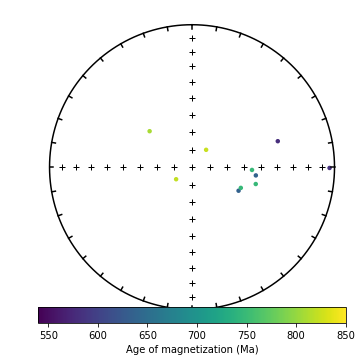

In [44]:
# approximately the mean coordinates of all sites on the E side of the mountains
slat = 27.9
slon = 108.8

# convert pole position to a direction at our Banxi sites
decs = np.array([])
incs = np.array([])
for i in range(len(NP_compiled.index)):
    dec, inc = pmag.vgp_di(NP_compiled['lat'][i], NP_compiled['lon'][i], slat, slon)
    decs = np.append(decs, dec)
    incs = np.append(incs, inc)

# add to dataframe
NP_compiled['dec'] = np.round(decs,1)
NP_compiled['inc'] = np.round(incs,1)
        
# plot using a colormap
color_inds = (NP_compiled['age']-540)/(850-540)
colors = cmap(color_inds)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)

for i in range(len(decs)):
    ipmag.plot_di(dec=decs[i],inc=incs[i],color=colors[i])
    
# add the colorbar (note that this colorbar is not tied to the scatter above - it is manually created)
norm = mpl.colors.Normalize(vmin=540, vmax=850)
cax = inset_axes(plt.gca(), width='100%', height='5%', loc=8)
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='horizontal')
cbar.set_label('Age of magnetization (Ma)')

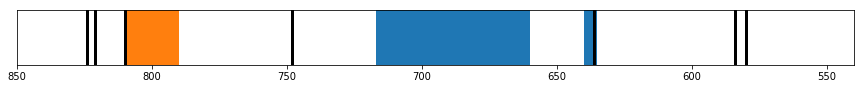

In [51]:
fig, ax = plt.subplots(figsize=(15,1))

ax.plot()
ax.set_xlim(850,540)

rect = mpl.patches.Rectangle((660,0),(717-660),1,facecolor='C0')
ax.add_patch(rect)

rect = mpl.patches.Rectangle((635,0),(640-635),1,facecolor='C0')
ax.add_patch(rect)

rect = mpl.patches.Rectangle((790,0),(810-790),1,facecolor='C1')
ax.add_patch(rect)

for i in range(len(NP_compiled.index)):
    ax.axvline(NP_compiled['age'][i], c='k', linewidth=3)
    
ax.set_ylim(0,1)
ax.set_yticks([])

plt.show(fig)

## Version 2

Averaging of poles, taken from Zhang et al. (2015).

### Poles

In [24]:
Zhang2015_compiled = pd.read_csv('../Data/Zhang2015b_SouthChina.csv')

### Plots

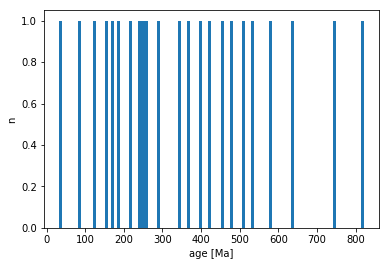

In [25]:
fig, ax = plt.subplots()
ax.hist(Zhang2015_compiled['age'], bins=100)
ax.set_xlabel('age [Ma]')
ax.set_ylabel('n')
plt.show(fig)

In [ ]:
# initiate the figure
plt.figure(figsize=(6, 6))
pmap = Basemap(projection='ortho',lat_0=35,lon_0=180,
               resolution='c',area_thresh=50000)
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))

# Loop through the uploaded data and use the plot_pole_colorbar function
# (instead of plot_pole) to plot the individual poles. The input of this
# function is very similar to that of plot_pole but has the additional
# arguments of (1)AGE, (2)MINIMUM AND (3)MAXIMUM AGES OF PLOTTED POLES.
# Note that the ages are treated as negative numbers -- this just determines
# the direction of the colorbar.
for i in range(len(Zhang2015_compiled.index)):
     m = ipmag.plot_pole_colorbar(pmap,
                                 Zhang2015_compiled['lon'][i],
                                 Zhang2015_compiled['lat'][i],
                                 Zhang2015_compiled['a95'][i],
                                 -Zhang2015_compiled['age'][i],
                                 -np.max(Zhang2015_compiled['age']),
                                 -np.min(Zhang2015_compiled['age']),
                                 markersize=40, color="k", alpha=1)       

pmap.colorbar(m,location='bottom',pad="5%",label='Age of magnetization (Ma)')

plt.show()

In [ ]:
# convert pole position to a direction at our Banxi sites
decs = np.array([])
incs = np.array([])
for i in range(len(Zhang2015_compiled.index)):
    dec, inc = pmag.vgp_di(Zhang2015_compiled['lat'][i], Zhang2015_compiled['lon'][i], slat, slon)
    decs = np.append(decs, dec)
    incs = np.append(incs, inc)

# add to dataframe
Zhang2015_compiled['dec'] = np.round(decs,1)
Zhang2015_compiled['inc'] = np.round(incs,1)
        
# plot using a colormap
color_inds = (-Zhang2015_compiled['age']+np.max(Zhang2015_compiled['age']))/\
             (np.max(Zhang2015_compiled['age'])-np.min(Zhang2015_compiled['age']))
colors = [mpl.cm.viridis(i) for i in color_inds]
fig = plt.figure(num=0,figsize=(5,5))
ipmag.plot_net(0)
ipmag.plot_di(dec=decs,inc=incs,color=colors)

# PLF
s_igrf = ipmag.igrf([2017.5, 1, slat, slon])
ipmag.plot_di(dec=s_igrf[0],inc=s_igrf[1],color='r',markersize=100,legend='yes',label='PLF')

# add the colorbar (note that this colorbar is not tied to the scatter above - it is manually created)
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=-np.max(compiled['age']), vmax=-np.min(compiled['age']))
cax = inset_axes(plt.gca(), width='100%', height='5%', loc=8)
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='horizontal')
cbar.set_label('Age of magnetization (Ma)')

plt.show(fig)